# Libraries

API docs:
- http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [1]:
import os

import pandas as pd
import numpy as np

from sklearn import preprocessing, metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedShuffleSplit
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns

# Preparing Data

Some data preparation best practices:
- https://towardsdatascience.com/6-amateur-mistakes-ive-made-working-with-train-test-splits-916fabb421bb

In [2]:
print(os.listdir('../datasets/input'))

['test.csv', 'train.csv', 'ni.csv']


In [3]:
# df = pd.read_csv('../datasets/input/ni.csv')
# X = df.drop(['class'], axis=1)
# y = df['class'].values.astype(object)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

train = pd.read_csv('../datasets/input/train.csv')
test = pd.read_csv('../datasets/input/test.csv')

X_train = train.drop(['class'], axis=1)
y_train = train['class'].values
X_test = test.drop(['class'], axis=1)
y_test = test['class'].values

X_min_train = train.drop(['m1', 'm2', 'm3', 'm4', 'm5', 'mtot', 'fermi', 'band', 'class'], axis=1)
y_min_train = train['class'].values
X_min_test = test.drop(['m1', 'm2', 'm3', 'm4', 'm5', 'mtot', 'fermi', 'band', 'class'], axis=1)
y_min_test = test['class'].values

print(X_min_train.shape, X_min_test.shape)
print(X_min_train.shape, X_min_test.shape)

(128, 31) (64, 31)
(128, 31) (64, 31)


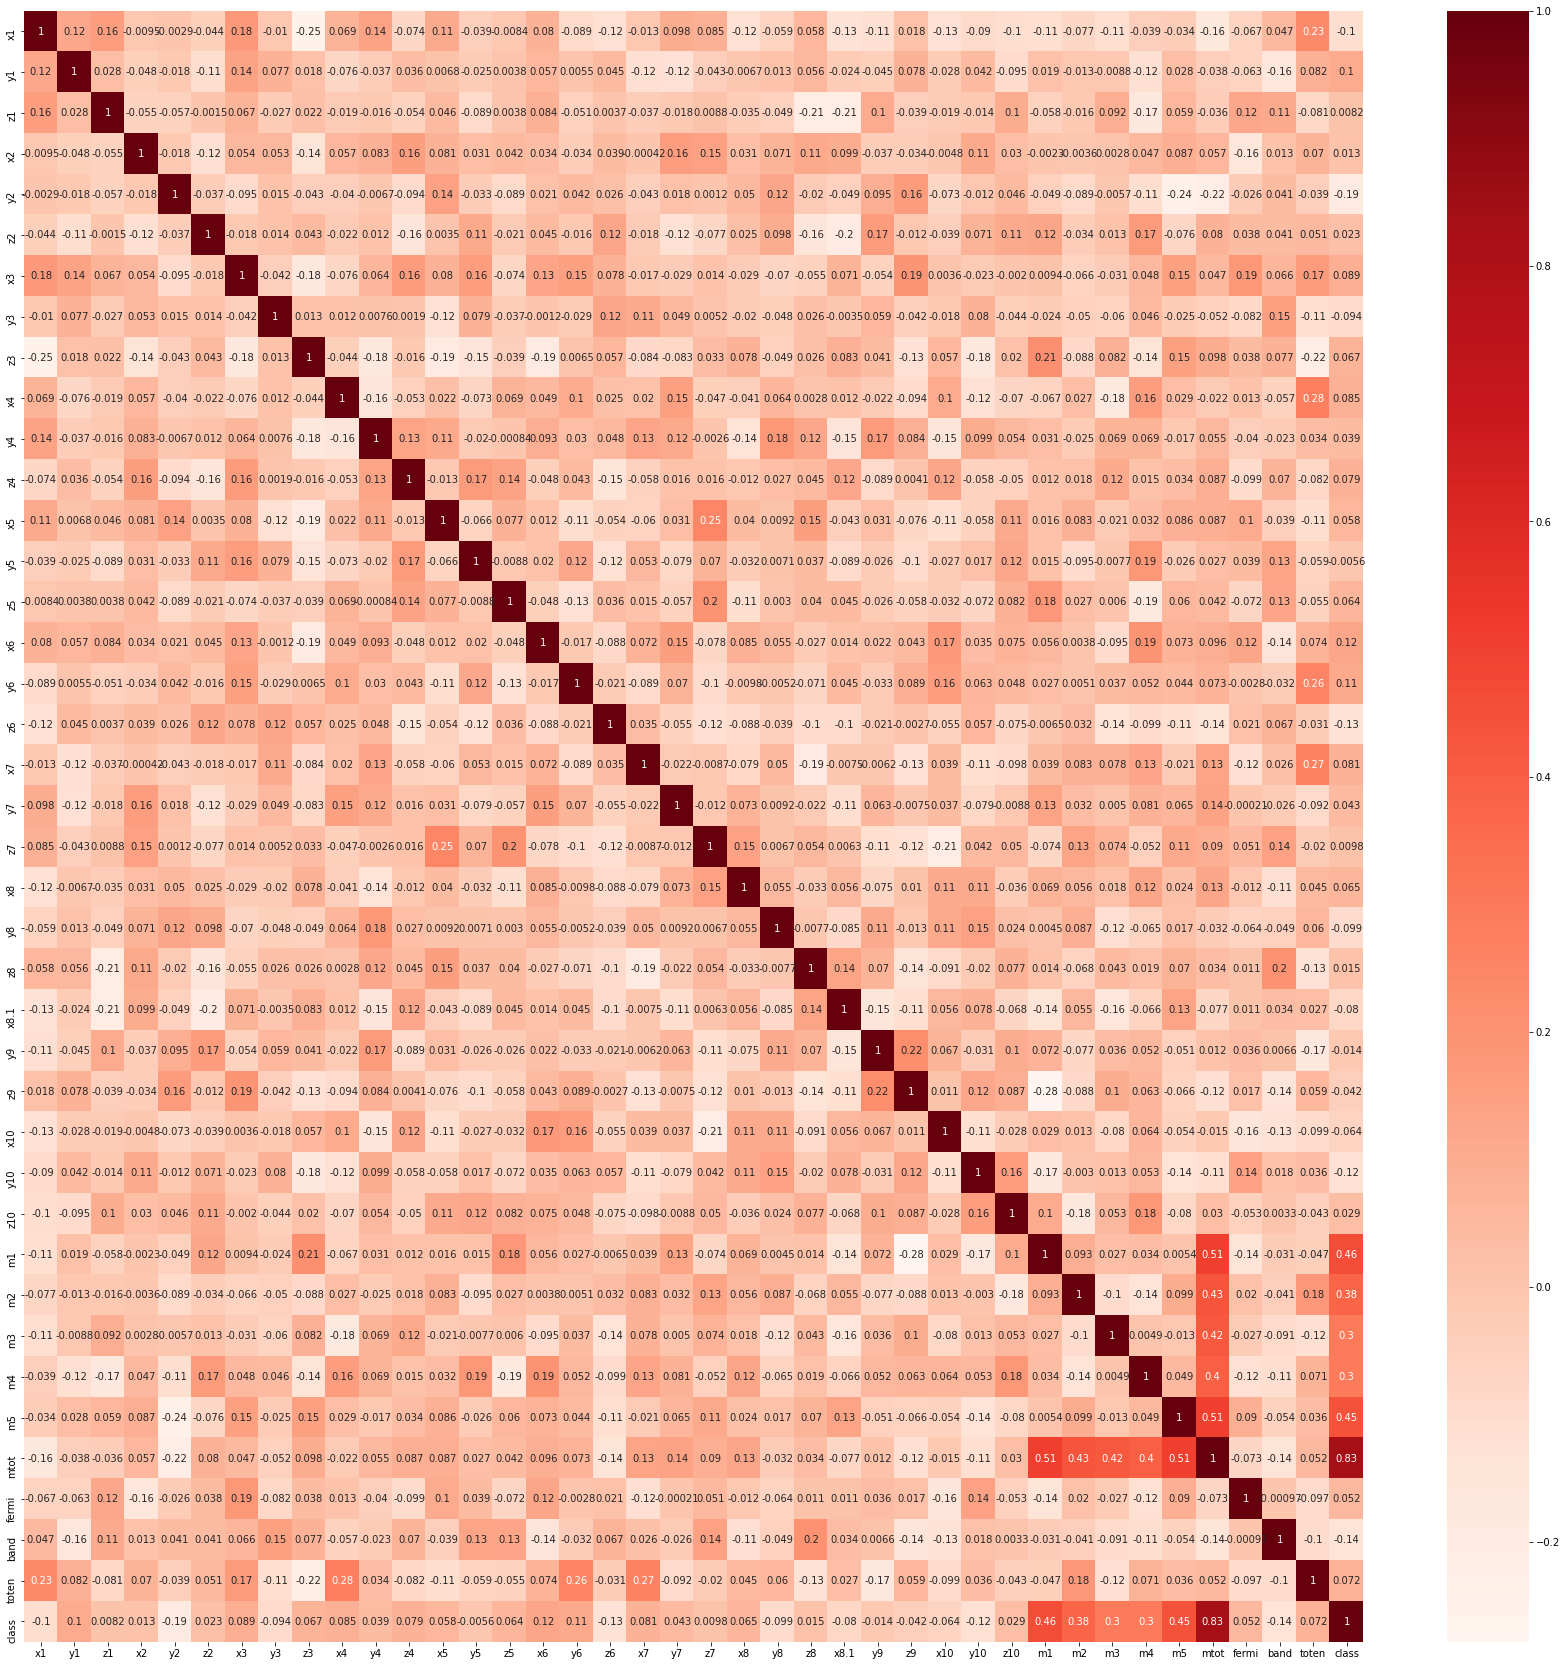

In [15]:
plt.figure(figsize=(30, 30))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [4]:
X_train.head(n=10)

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z10,m1,m2,m3,m4,m5,mtot,fermi,band,toten
0,0.431456,0.107513,1.396628,1.679842,0.121777,0.482316,0.876933,1.095127,1.478044,0.971940,...,0.758408,0.527947,0.939192,0.176836,0.202561,0.795821,2.642357,-0.101576,-113.898530,-43.358939
1,1.644993,1.197024,1.492482,1.129911,0.900090,1.245120,1.975141,0.553812,0.098471,0.619238,...,1.717697,0.328478,0.859305,0.706822,0.174172,0.193357,2.262135,-0.441243,-113.276182,-9.799597
2,1.802871,1.236479,1.487446,0.603173,1.635435,0.690753,0.682138,0.145997,0.845390,1.674235,...,0.394640,0.323629,0.924925,0.005358,0.078917,0.131187,1.464016,0.460717,-71.408598,-29.068981
3,0.730982,1.510362,0.204178,1.456497,1.239275,1.179180,0.908803,0.299659,0.763325,0.166348,...,0.346047,0.352276,0.660939,0.273748,0.176128,0.449573,1.912664,-0.306352,-145.079270,-8.523786
4,1.438282,1.561723,0.524540,0.784471,1.471769,1.334637,1.943356,1.983835,1.011546,0.869539,...,0.429976,0.282354,0.775516,0.499140,0.865310,0.509904,2.932224,0.093601,-139.861145,-1.287547
5,1.570639,0.005196,1.561710,0.599938,0.448632,1.119333,0.358892,1.245211,0.650860,1.974544,...,0.819926,0.111759,0.343881,0.764816,0.569522,0.548321,2.338299,0.109816,-99.666555,-43.276651
6,0.733344,0.999795,0.026467,0.876453,1.048964,1.904316,0.457871,0.741036,0.387909,0.537286,...,1.723005,0.973857,0.682477,0.601368,0.984343,0.330941,3.572986,-0.409738,-112.594601,-30.394016
7,0.921830,0.403226,1.624897,1.737442,1.975298,1.097986,0.884016,0.738994,0.278207,0.765878,...,1.167656,0.033409,0.322906,0.727899,0.483779,0.014370,1.582363,0.426618,-65.529148,-29.768795
8,0.617746,1.550812,0.269033,1.428494,1.846398,0.692304,1.621950,1.338102,1.121065,1.633011,...,1.691715,0.705802,0.289435,0.448165,0.629725,0.366774,2.439901,-0.338981,-119.193121,-13.779239
9,0.688213,1.311201,0.865559,0.161533,1.115565,1.550459,1.992622,1.190605,0.948188,0.115561,...,1.958423,0.357050,0.072831,0.791265,0.487481,0.568131,2.276758,-0.188759,-77.505899,-17.287339


In [5]:
X_min_train.head(n=10)

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x8,y8,z8,x8.1,y9,z9,x10,y10,z10,toten
0,0.431456,0.107513,1.396628,1.679842,0.121777,0.482316,0.876933,1.095127,1.478044,0.971940,...,0.253182,0.478341,0.157559,1.346587,1.422126,1.714839,1.192020,0.114304,0.758408,-43.358939
1,1.644993,1.197024,1.492482,1.129911,0.900090,1.245120,1.975141,0.553812,0.098471,0.619238,...,0.058286,0.970124,0.115569,0.396960,1.263964,1.677858,0.908976,0.064427,1.717697,-9.799597
2,1.802871,1.236479,1.487446,0.603173,1.635435,0.690753,0.682138,0.145997,0.845390,1.674235,...,0.157141,1.928177,1.364170,0.648183,0.758067,1.347514,0.323479,0.941165,0.394640,-29.068981
3,0.730982,1.510362,0.204178,1.456497,1.239275,1.179180,0.908803,0.299659,0.763325,0.166348,...,0.940658,1.620304,1.385345,1.417335,1.946890,1.171826,1.866863,1.090756,0.346047,-8.523786
4,1.438282,1.561723,0.524540,0.784471,1.471769,1.334637,1.943356,1.983835,1.011546,0.869539,...,0.897357,0.356100,0.299863,0.722128,0.875404,1.708981,0.176418,0.920412,0.429976,-1.287547
5,1.570639,0.005196,1.561710,0.599938,0.448632,1.119333,0.358892,1.245211,0.650860,1.974544,...,0.003049,1.343874,1.348011,0.945085,1.904443,1.073749,0.474752,0.439751,0.819926,-43.276651
6,0.733344,0.999795,0.026467,0.876453,1.048964,1.904316,0.457871,0.741036,0.387909,0.537286,...,0.110951,1.858563,1.831296,1.583804,1.664039,0.283138,0.799974,1.816725,1.723005,-30.394016
7,0.921830,0.403226,1.624897,1.737442,1.975298,1.097986,0.884016,0.738994,0.278207,0.765878,...,0.995975,1.286293,1.260060,0.520113,0.758139,1.769518,0.916128,1.823794,1.167656,-29.768795
8,0.617746,1.550812,0.269033,1.428494,1.846398,0.692304,1.621950,1.338102,1.121065,1.633011,...,1.577461,1.784289,0.381802,0.190564,1.455461,1.944386,0.842377,1.704691,1.691715,-13.779239
9,0.688213,1.311201,0.865559,0.161533,1.115565,1.550459,1.992622,1.190605,0.948188,0.115561,...,1.761076,1.208969,0.835412,1.158158,0.444625,1.256859,0.783365,1.987363,1.958423,-17.287339


# Parameter Tunning and Training

Useful notebook references:
- https://www.kaggle.com/waltermaffy/fruit-classification-pca-svm-knn-decision-tree
- https://www.kaggle.com/tariqmhmd5/pima-india-diabetes-prediction-with-6-algorithms/data
- https://www.kaggle.com/lbronchal/sentiment-analysis-with-svm
- https://www.kaggle.com/pierra/credit-card-dataset-svm-classification

In [16]:
grid_params = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [18]:
clf = GridSearchCV(SVC(), grid_params, cv=cv)
clf.fit(X_train, y_train)

print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [19]:
y_pred = clf.predict(X_test)

print(metrics.accuracy_score(y_pred, y_test))

0.78125


In [20]:
clf_min = GridSearchCV(SVC(), grid_params, cv=cv)
clf_min.fit(X_min_train, y_min_train)

print(clf_min.best_params_)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [21]:
y_min_pred = clf_min.predict(X_min_test)

print(metrics.accuracy_score(y_min_pred, y_min_test))

0.5


# Model Evaluaiton

Useful references:
- https://heartbeat.fritz.ai/introduction-to-machine-learning-model-evaluation-fa859e1b2d7f
- https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
- https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
- https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

In [22]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[24  8]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.76      0.81      0.79        32

    accuracy                           0.78        64
   macro avg       0.78      0.78      0.78        64
weighted avg       0.78      0.78      0.78        64



In [23]:
print(confusion_matrix(y_min_test, y_min_pred))
print(classification_report(y_min_test, y_min_pred))

[[ 0 32]
 [ 0 32]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.50      1.00      0.67        32

    accuracy                           0.50        64
   macro avg       0.25      0.50      0.33        64
weighted avg       0.25      0.50      0.33        64



/Users/fajar/materials/research/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.78125
0.5


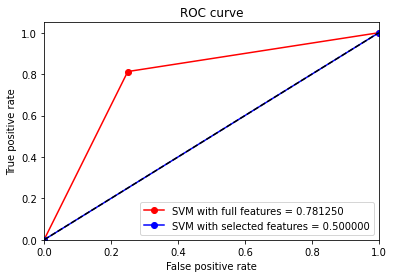

In [24]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print(roc_auc)

fpr_min, tpr_min, _ = roc_curve(y_min_test, y_min_pred)
roc_auc_min = auc(fpr_min, tpr_min)

print(roc_auc_min)

plt.figure()
plt.plot(fpr, tpr, 'ro-', label='SVM with full features = %f' %roc_auc)
plt.plot(fpr_min, tpr_min, 'bo-', label='SVM with selected features = %f' %roc_auc_min)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()